In [2]:
import pandas as pd
import sklearn.model_selection

In [3]:
city_income = pd.read_csv('城市收入.csv', index_col=0)
city_income

,城市,收入
0,上海,64183
1,北京,62361
2,深圳,57543
3,苏州,55476
4,广州,55029
...,...,...
145,荆州,24174
146,淮北,24143
147,鹤壁,24093
148,肇庆,24071


In [4]:
city_income_dict = {}
for index, row in city_income.iterrows():
    city_income_dict[row['城市']] = row['收入']

city_income_dict

{'上海': 64183,
 '北京': 62361,
 '深圳': 57543,
 '苏州': 55476,
 '广州': 55029,
 '杭州': 54348,
 '南京': 52916,
 '宁波': 52402,
 '厦门': 50948,
 '无锡': 50373,
 '佛山': 49630,
 '绍兴': 49389,
 '东莞': 49331,
 '舟山': 49217,
 '珠海': 48107,
 '嘉兴': 47380,
 '温州': 46920,
 '中山': 46865,
 '常州': 45933,
 '长沙': 44647,
 '湖州': 44487,
 '金华': 44326,
 '台州': 43973,
 '武汉': 42133,
 '青岛': 42019,
 '克拉玛依': 41850,
 '包头': 41755,
 '乌海': 41551,
 '镇江': 40883,
 '济南': 39944,
 '天津': 39506,
 '鄂尔多斯': 38521,
 '沈阳': 48494,
 '嘉峪关': 38081,
 '大连': 37960,
 '东营': 37586,
 '乌鲁木齐': 37294,
 '南通': 37071,
 '威海': 36626,
 '马鞍山': 36482,
 '成都': 36142,
 '泉州': 36088,
 '阿拉善': 35854,
 '呼和浩特': 35683,
 '福州': 35376,
 '合肥': 35175,
 '昆明': 35032,
 '烟台': 34901,
 '淄博': 34730,
 '泰州': 34642,
 '南昌': 34191,
 '扬州': 34076,
 '株洲': 33953,
 '惠州': 33930,
 '郑州': 33105,
 '盘锦': 32978,
 '衢州': 32269,
 '丽水': 32245,
 '大庆': 31943,
 '芜湖': 31445,
 '西安': 31407,
 '新余': 31302,
 '海口': 31205,
 '攀枝花': 31044,
 '太原': 31031,
 '三亚': 30487,
 '银川': 30452,
 '兰州': 30403,
 '贵阳': 30310,
 '唐山': 30309,
 '鞍山': 3

In [5]:
boss_zhipin = pd.read_csv('职业总数据.csv')
boss_zhipin

,job,place,salary,limit
0,传单派送,南昌,3.0,不限
1,传单派送,常德,3.5,不限
2,NaN,徐州,3.5,不限
3,传单派送,南宁,5.5,本科
4,NaN,合肥,4.5,不限
...,...,...,...,...
264,家教,北京,4.0,不限
265,家教,珠海,5.0,不限
266,家教,天津,5.0,专科
267,家教,石家庄,9.0,本科


In [6]:
boss_zhipin = boss_zhipin.replace('传单派送','服务类')
boss_zhipin = boss_zhipin.replace('售货员','销售类')
boss_zhipin = boss_zhipin.replace('推销员','销售类')
boss_zhipin = boss_zhipin.replace('服务员','服务类')
boss_zhipin = boss_zhipin.replace('家教','教育类')
boss_zhipin = boss_zhipin.replace('快递员','服务类')

In [7]:
for key in city_income_dict:
    boss_zhipin = boss_zhipin.replace(key, city_income_dict[key])

boss_zhipin.columns = ['职业', '城市平均收入', '时薪', '学历限制']
boss_zhipin

,职业,城市平均收入,时薪,学历限制
0,服务类,34191,3.0,不限
1,服务类,常德,3.5,不限
2,NaN,27385,3.5,不限
3,服务类,26798,5.5,本科
4,NaN,35175,4.5,不限
...,...,...,...,...
264,教育类,62361,4.0,不限
265,教育类,48107,5.0,不限
266,教育类,39506,5.0,专科
267,教育类,26839,9.0,本科


In [8]:
import re

for index, row in boss_zhipin.iterrows():
    if not re.match('\d+', str(row['城市平均收入'])):
        boss_zhipin.loc[index, '城市平均收入'] = None
boss_zhipin

,职业,城市平均收入,时薪,学历限制
0,服务类,34191,3.0,不限
1,服务类,None,3.5,不限
2,NaN,27385,3.5,不限
3,服务类,26798,5.5,本科
4,NaN,35175,4.5,不限
...,...,...,...,...
264,教育类,62361,4.0,不限
265,教育类,48107,5.0,不限
266,教育类,39506,5.0,专科
267,教育类,26839,9.0,本科


In [60]:
boss_zhipin.dropna(axis=0, how='any', inplace=True)
boss_zhipin.to_csv('Boss 直聘数据集-分类后.csv')

In [49]:
import numpy as np
import sklearn.impute

job_array = np.array(boss_zhipin['职业'])
job_array = sklearn.impute.SimpleImputer(strategy='most_frequent').fit_transform(job_array.reshape(-1,1))
job_array

array([['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['服务类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       ['教育类'],
       [

In [50]:
np.unique(job_array)

array(['教育类', '服务类', '销售类'], dtype=object)

In [51]:
target = sklearn.preprocessing.LabelEncoder().fit_transform(job_array)
target

c:\environment\python3.8.5\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
city_mean_income = np.array(boss_zhipin['城市平均收入'])
city_mean_income = sklearn.impute.SimpleImputer(strategy='median').fit_transform(city_mean_income.reshape(-1,1))
city_mean_income

array([[34191.],
       [26798.],
       [62361.],
       [57543.],
       [64183.],
       [64183.],
       [30049.],
       [34191.],
       [30206.],
       [50948.],
       [34191.],
       [27204.],
       [36142.],
       [44647.],
       [52916.],
       [44647.],
       [34191.],
       [39944.],
       [54348.],
       [37294.],
       [39506.],
       [57543.],
       [55029.],
       [35683.],
       [26386.],
       [64183.],
       [62361.],
       [48107.],
       [48107.],
       [39506.],
       [55029.],
       [44487.],
       [48107.],
       [49630.],
       [62361.],
       [57543.],
       [31407.],
       [57543.],
       [26839.],
       [48494.],
       [31407.],
       [55029.],
       [36142.],
       [42133.],
       [36142.],
       [62361.],
       [42133.],
       [35376.],
       [64183.],
       [62361.],
       [35032.],
       [39944.],
       [44647.],
       [31407.],
       [31407.],
       [31407.],
       [62361.],
       [57543.],
       [62361.

In [53]:
salary_array = np.array(boss_zhipin['时薪']).reshape(-1, 1)
salary_array

array([[ 3.  ],
       [ 5.5 ],
       [ 8.5 ],
       [ 7.5 ],
       [ 6.5 ],
       [10.5 ],
       [ 7.  ],
       [13.5 ],
       [ 5.  ],
       [ 3.5 ],
       [ 6.  ],
       [ 3.5 ],
       [ 3.5 ],
       [ 4.2 ],
       [ 4.8 ],
       [26.4 ],
       [ 1.5 ],
       [ 2.5 ],
       [ 3.5 ],
       [ 4.5 ],
       [ 3.  ],
       [ 4.5 ],
       [ 3.  ],
       [ 3.5 ],
       [ 1.5 ],
       [ 4.2 ],
       [ 6.  ],
       [ 5.5 ],
       [ 3.5 ],
       [ 1.5 ],
       [ 3.5 ],
       [ 1.5 ],
       [ 4.2 ],
       [ 3.5 ],
       [17.5 ],
       [42.5 ],
       [ 8.5 ],
       [21.  ],
       [ 7.  ],
       [ 7.5 ],
       [ 9.5 ],
       [ 4.  ],
       [10.5 ],
       [22.5 ],
       [ 8.5 ],
       [13.5 ],
       [ 4.05],
       [ 6.5 ],
       [16.  ],
       [30.  ],
       [17.5 ],
       [ 9.5 ],
       [ 7.5 ],
       [15.  ],
       [ 9.5 ],
       [ 8.  ],
       [25.  ],
       [22.5 ],
       [30.  ],
       [16.  ],
       [10.5 ],
       [ 8.5 ],
       [

In [54]:
limit_array = np.array(boss_zhipin['学历限制'])
limit_array = sklearn.preprocessing.OneHotEncoder().fit_transform(limit_array.reshape(-1,1)).toarray()
limit_array

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [55]:
data = np.concatenate((city_mean_income, salary_array, limit_array), axis=1)
data

array([[3.4191e+04, 3.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
       [2.6798e+04, 5.5000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
       [6.2361e+04, 8.5000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00],
       ...,
       [3.9506e+04, 5.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00],
       [2.6839e+04, 9.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00],
       [3.5376e+04, 6.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00]])

In [56]:
import sklearn.ensemble

class Model:
    def __init__(self):
        self.data = data
        self.target = target
        self.train_x, self.test_x, self.train_y, self.test_y = sklearn.model_selection.train_test_split(self.data, self.target)

    def fit(self, n_estimators, max_depth, min_sample_leaf):
        classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                                             max_depth=max_depth,
                                                             min_samples_leaf=min_sample_leaf,
                                                             criterion='entropy')
        classifier.fit(self.train_x, self.train_y)
        return classifier.score(self.train_x, self.train_y), classifier.score(self.test_x, self.test_y)

In [57]:
model = Model()

In [58]:
y=[]
for i in range(1,40):
    y.append(model.fit(10,10,int(i)))

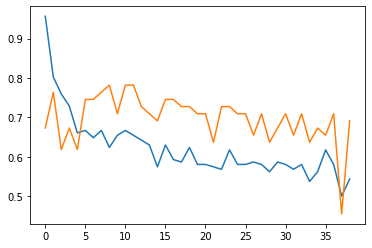

In [59]:
import matplotlib.pyplot as plt

plt.plot(y)

In [56]:
classifier = sklearn.ensemble.GradientBoostingClassifier().fit(model.train_x, model.train_y)
classifier.score(model.test_x, model.test_y)
classifier.score(model.train_x, model.train_y)


0.9054726368159204